Accuracy: 0.5535714285714286


<Figure size 1000x800 with 0 Axes>

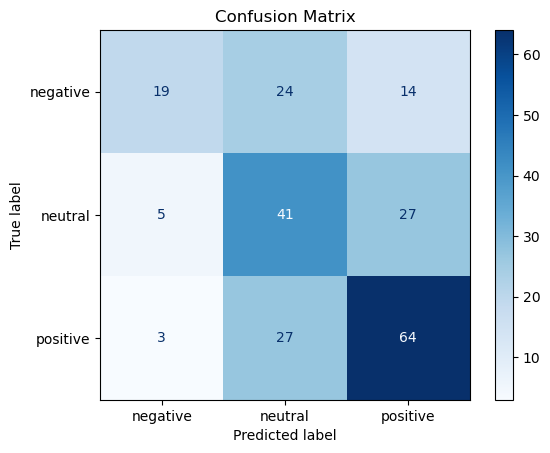

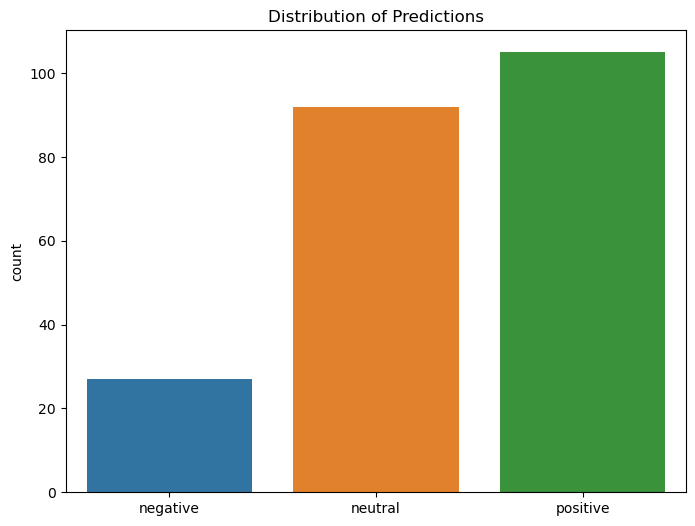

              precision    recall  f1-score   support

    negative       0.70      0.33      0.45        57
     neutral       0.45      0.56      0.50        73
    positive       0.61      0.68      0.64        94

    accuracy                           0.55       224
   macro avg       0.59      0.53      0.53       224
weighted avg       0.58      0.55      0.55       224



In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.sparse import hstack
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV
data = pd.read_csv("preprocessed.csv")

# Replace NaNs in 'Text_Stemmed' column with empty string
data['Text_Stemmed'].fillna("", inplace=True)

# Preprocess text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Text_Stemmed'])

# Numeric features: Year, Month, Day
X_numeric = data[['Year', 'Month', 'Day']]

# Categorical features: Time of Tweet and Platform
time_encoder = OneHotEncoder()
X_time = time_encoder.fit_transform(data[['Time of Tweet']])
platform_encoder = OneHotEncoder()
X_platform = platform_encoder.fit_transform(data[['Platform']])

# Scale numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine text, categorical, and numeric features
X = hstack((X_text, X_time, X_platform, X_numeric_scaled))

# Sentiment labels
y = data['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(X_train, y_train)

# Predict sentiment on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, order=model.classes_)
plt.title('Distribution of Predictions')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, target_names=model.classes_)
print(report)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\Jovana\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.5747985347985349


c:\Users\Jovana\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5758928571428571


<Figure size 1000x800 with 0 Axes>

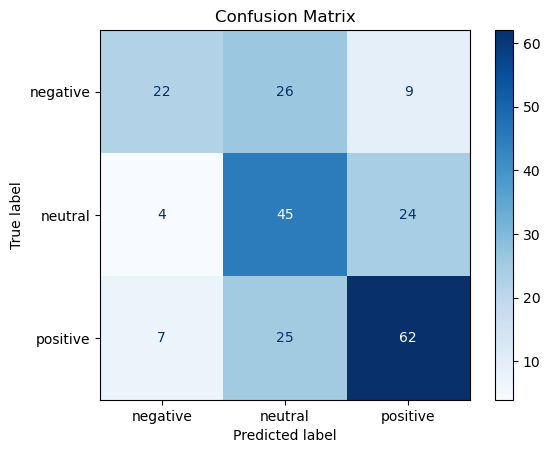

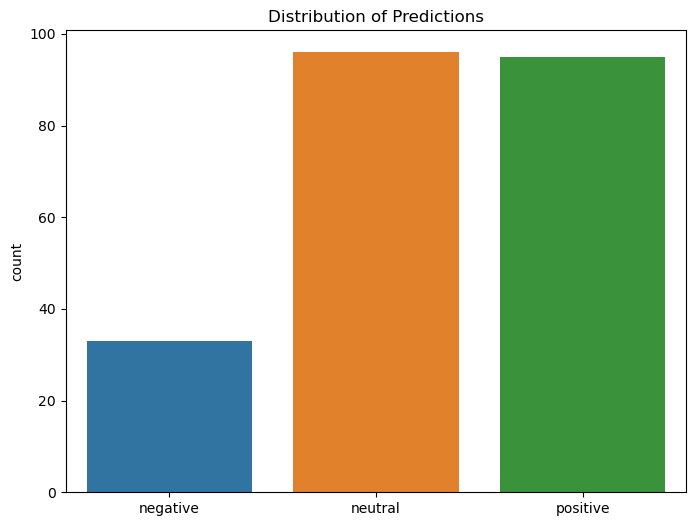

              precision    recall  f1-score   support

    negative       0.67      0.39      0.49        57
     neutral       0.47      0.62      0.53        73
    positive       0.65      0.66      0.66        94

    accuracy                           0.58       224
   macro avg       0.60      0.55      0.56       224
weighted avg       0.60      0.58      0.57       224



In [23]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers
    'penalty': ['l1', 'l2']  # Regularization penalty
}

# Initialize the model
model = LogisticRegression(max_iter=1000, multi_class='ovr')

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict sentiment on test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, order=best_model.classes_)
plt.title('Distribution of Predictions')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, target_names=best_model.classes_)
print(report)
